Available 'name' values: ['Ozone (O3)' 'Nitrogen dioxide (NO2)' 'Fine particles (PM 2.5)']
Available 'measure' values: ['Mean']
Available 'geo_type_name' values: ['CD' 'UHF42' 'UHF34' 'Borough' 'Citywide']
Filtered Data Preview:
           borough        nox
142      Manhattan  16.749885
206       Brooklyn  12.522216
213  Staten Island   9.286177
251         Queens  11.549676
359          Bronx  12.819131
Unique boroughs in filtered data: ['Manhattan' 'Brooklyn' 'Staten Island' 'Queens' 'Bronx']
Number of rows after filtering: 15

Summary Statistics by Borough:
               count       mean       std        min        25%        50%  \
borough                                                                      
Bronx            3.0  16.106675  3.474819  12.819131  14.288746  15.758360   
Brooklyn         3.0  17.024202  4.718108  12.522216  14.570207  16.618197   
Manhattan        3.0  19.615970  2.913522  16.749885  18.136596  19.523307   
Queens           3.0  15.451208  3.891994 

/var/folders/vx/d27_r9zn3q92qt0_lvm7zmb80000gn/T/ipykernel_40042/838766827.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


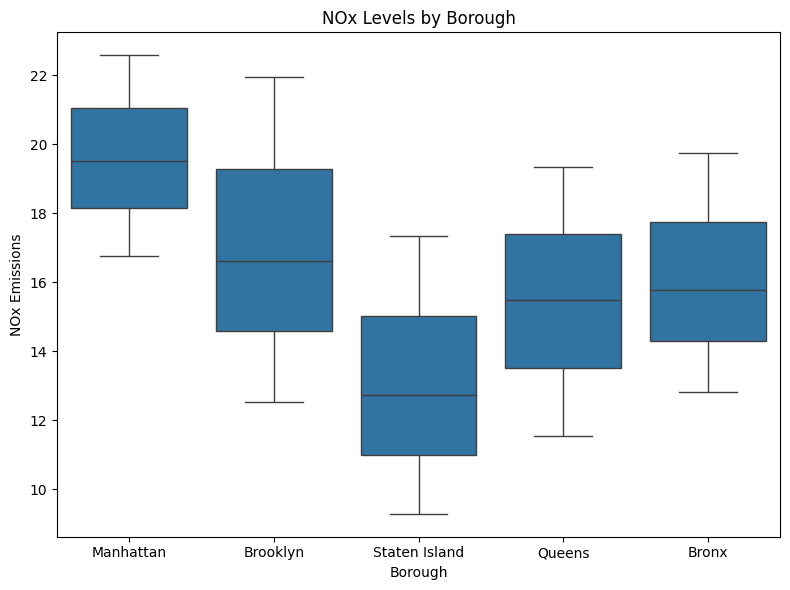

In [7]:
# Week 11: Introduction to ANOVA - NYC Emissions Case Study

# Step 1: Load Libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Data from NYC Open Data Portal
url = 'https://data.cityofnewyork.us/resource/c3uy-2p5r.csv'
emissions_raw = pd.read_csv(url)

# Step 2.1: Filter for Nitrogen Dioxide (NO2) and Boroughs
print("Available 'name' values:", emissions_raw['name'].unique())
print("Available 'measure' values:", emissions_raw['measure'].unique())
print("Available 'geo_type_name' values:", emissions_raw['geo_type_name'].unique())

# Adjust filter based on actual values in the dataset
emissions = emissions_raw[
    (emissions_raw['name'].str.contains('Nitrogen dioxide', case=False, na=False)) &
    (emissions_raw['geo_type_name'] == 'Borough') &
    (emissions_raw['measure'].str.contains('mean', case=False, na=False))
]

# Rename and clean up
emissions = emissions.rename(columns={
    'geo_place_name': 'borough',
    'data_value': 'nox'
})
emissions['nox'] = pd.to_numeric(emissions['nox'], errors='coerce')
emissions = emissions.dropna(subset=['nox'])

print("Filtered Data Preview:")
print(emissions[['borough', 'nox']].head())
print("Unique boroughs in filtered data:", emissions['borough'].unique())
print("Number of rows after filtering:", len(emissions))

# Check if there is enough data to run ANOVA
if emissions['borough'].nunique() < 2 or emissions.empty:
    print("Not enough data to run ANOVA. Please check filtering criteria or dataset availability.")
else:
    # Step 3: Summary Statistics
    print("\nSummary Statistics by Borough:")
    print(emissions.groupby('borough')['nox'].describe())

    # Step 4: Run One-Way ANOVA
    model = ols('nox ~ C(borough)', data=emissions).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print("\nANOVA Table:")
    print(anova_table)

    # Step 5: Interpret Results
    if anova_table['PR(>F)'][0] < 0.05:
        print("\nResult: Significant differences in NOx levels between boroughs (reject H0)")
    else:
        print("\nResult: No significant differences in NOx levels (fail to reject H0)")

    # Step 6: Visualize Group Differences
    plt.figure(figsize=(8,6))
    sns.boxplot(x='borough', y='nox', data=emissions)
    plt.title('NOx Levels by Borough')
    plt.xlabel('Borough')
    plt.ylabel('NOx Emissions')
    plt.tight_layout()
    plt.show()



### **Explanation of ANOVA Results**

**Available Data**  
- **Pollutant:** Nitrogen Dioxide (NO₂)  
- **Geography Type:** Borough  
- **Measure Type:** Mean  
- The dataset provided values for all five NYC boroughs: Manhattan, Brooklyn, Staten Island, Queens, and Bronx.

**Sample Size**
- Each borough had only **three observations**, totaling **15 records**, which is a small sample size for detecting statistically significant differences.

---

###  **Summary Statistics**
- Manhattan had the highest average NOx level (~19.6), followed by Brooklyn (~17.0).
- Staten Island had the lowest (~13.1).
- Despite differences in means, there was also **high variation** (standard deviation) within each borough.

---

###  **ANOVA Results**
```text
F-statistic = 1.1339
p-value = 0.3945
```
- The **p-value > 0.05**, so we **fail to reject the null hypothesis**.
- This means there's **no statistically significant difference** in mean NOx levels between boroughs at the 95% confidence level.

---
###  **Statistical Background**
- When you compare a **p-value** to a threshold of **0.05**, you’re using a **significance level (α) of 0.05**.
- This corresponds to a **95% confidence level** (since: 1 − 0.05 = 0.95).
- In your code:

```python
if anova_table['PR(>F)'][0] < 0.05:
```

---

###  **Boxplot Interpretation**
- The boxplot shows that **Manhattan’s NOx levels are generally higher**, but there's considerable overlap in ranges across boroughs.
- With such a **small sample size**, it’s hard to confidently detect differences.

---

###  **Takeaway**
While boroughs show some variation in NOx levels, the **ANOVA test does not confirm that these differences are statistically significant**. 


---

More data would help strengthen the analysis use `Use the '$offset=' parameter by setting it to 1000 increments which will allow you to page through the entire dataset 1000 rows at a time.`from nyc open data
